# Common File

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm

SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30

mpl.rcParams['axes.grid'] = True
mpl.rcParams['figure.figsize']=(15,7)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

In [2]:
# np.random.seed(200) #-- works for lin reg
# np.random.seed(110)

# Data

In [11]:
data=pd.read_csv('DATA_basic.csv')
data

,Sr. No.,FG_name,FG Position,Redox Potential,mol_filename_neutral,FG_no_2d_basic,FG_position_1_2d_basic,FG_position_2_2d_basic,FG_position_3_2d_basic,FG_position_4_2d_basic,FG_position_6_2d_basic,FG_position_7_2d_basic,FG_position_8_2d_basic,FG_position_9_2d_basic
0,Phenazine,-,-,-1.74,PHENAZINE_neutral,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2CH3N,1,-1.85,2CH3N_R1_neutral,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2CH3N,2,-1.98,2CH3N_R2_neutral,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,NH2,1,-1.85,NH2_R1_neutral,14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,NH2,2,-1.92,NH2_R2_neutral,14,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,185,NO2,1 2 6 7,-0.35,NO2_R1267_neutral,15,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
181,186,NO2,1 4 6 9,-0.52,NO2_R1469_neutral,15,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
182,187,NO2,2 3 7 8,-0.52,NO2_R2378_neutral,15,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
183,188,NO2,1 2 3 4 6 9,0.16,NO2_R123469_neutral,15,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0


In [12]:
data.describe()

,Redox Potential,FG_no_2d_basic,FG_position_1_2d_basic,FG_position_2_2d_basic,FG_position_3_2d_basic,FG_position_4_2d_basic,FG_position_6_2d_basic,FG_position_7_2d_basic,FG_position_8_2d_basic,FG_position_9_2d_basic
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,-1.418162,11.935135,0.772973,0.600000,0.378378,0.227027,0.243243,0.302703,0.237838,0.200000
std,0.680095,4.536819,0.420047,0.491227,0.486299,0.420047,0.430205,0.460674,0.426915,0.401085
min,-2.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.950000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.690000,14.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-0.820000,15.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,0.800000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Preprocessing

In [14]:
from sklearn.model_selection import train_test_split

X=data.drop(columns=['Sr. No.','FG_name','FG Position','Redox Potential','mol_filename_neutral'])
y=data['Redox Potential']
data_train, data_test = train_test_split(data,
                                         shuffle=True,
                                         test_size=0.30)

X_train=data_train.drop(columns=['Sr. No.','FG_name','FG Position','Redox Potential','mol_filename_neutral'])
X_test=data_test.drop(columns=['Sr. No.','FG_name','FG Position','Redox Potential','mol_filename_neutral'])
y_train=data_train['Redox Potential']
y_test=data_test['Redox Potential']

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(129, 9) (129,)
(56, 9) (56,)


In [15]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

# EDA (Visualization)

## Distribution of Data

Text(0.5, 1.0, 'Distribution of Redox Potential (target variable)')

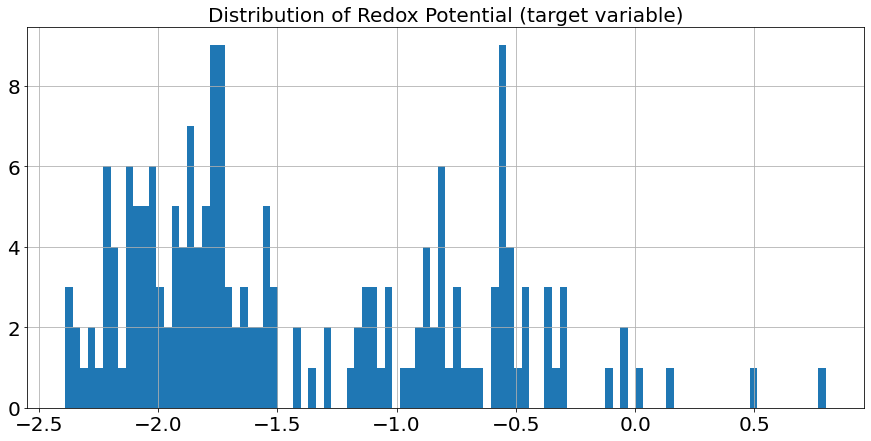

In [16]:
plt.hist(data['Redox Potential'],bins=100)
plt.title('Distribution of Redox Potential (target variable)')

Text(0.5, 1.0, 'Distribution of Functional Groups')

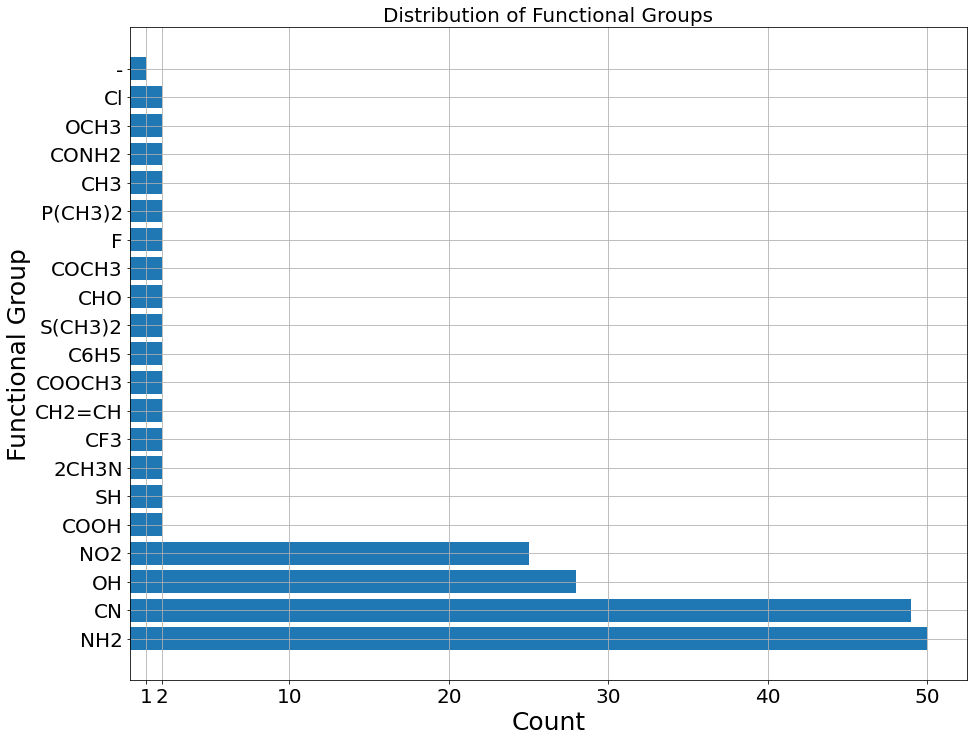

In [17]:
#seed=200
fg_dist=data['FG_name'].value_counts()
plt.figure(figsize=(15,12))
plt.barh(fg_dist.index,fg_dist)
plt.xlabel('Count')
plt.ylabel('Functional Group')
plt.xticks([1,2,10,20,30,40,50])
plt.title('Distribution of Functional Groups')

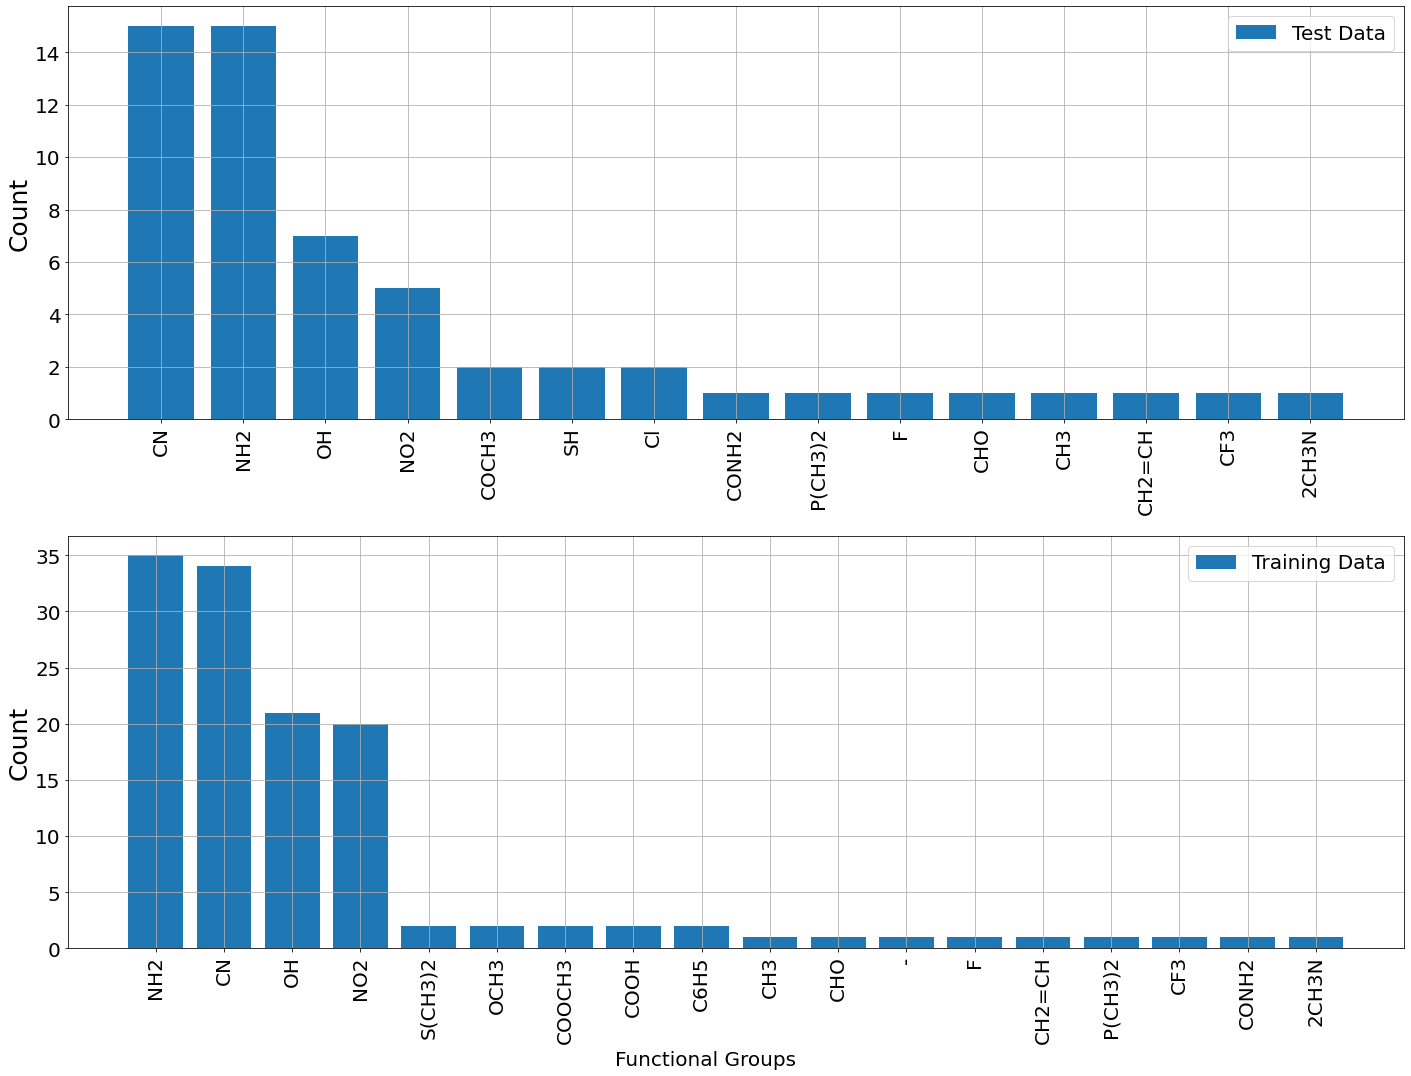

In [18]:
#seed=200
train_dist=data.iloc[X_train.index]['FG_name'].value_counts()
test_dist=data.iloc[X_test.index]['FG_name'].value_counts()

fig,(ax1,ax2)=plt.subplots(2,1,figsize=(20,15))

ax1.bar(test_dist.index,test_dist,label='Test Data')
ax2.bar(train_dist.index,train_dist,label='Training Data')

ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)
ax1.legend()
ax1.set_ylabel('Count')
ax2.legend()
ax2.set_ylabel('Count')
fig.text(0.5, 0, 'Functional Groups', ha='center', rotation='horizontal')
plt.tight_layout()

## Feature Correlations

In [62]:
# # plt.matshow(corr)
# # corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# import seaborn as sns
# pd.options.display.max_rows = 4000


# corr = data.corr()
# sns.heatmap(corr,cmap='coolwarm')
# plt.title('Feature Correlation Plot')

In [20]:
# fig,axes=plt.subplots(2,3,figsize=(16,8),sharey=True)
# axes[0][0].scatter(data['fr_aniline'],y)
# axes[0][0].set_xlabel('fr_aniline')
# axes[0][1].scatter(data['fr_NH2'],y)
# axes[0][1].set_xlabel('fr_NH2')
# axes[0][2].scatter(data['fr_ArN'],y)
# axes[0][2].set_xlabel('fr_ArN')
# axes[1][0].scatter(data['fr_NH0'],y)
# axes[1][0].set_xlabel('fr_NH0')
# axes[1][1].scatter(data['HallKierAlpha'],y)
# axes[1][1].set_xlabel('HallKierAlpha')
# axes[1][2].scatter(data['MaxPartialCharge'],y)
# axes[1][2].set_xlabel('MaxPartialCharge')
# fig.text(0, 0.5, 'Redox Potential', va='center', rotation='vertical')
# plt.tight_layout()

# Examples

## - Baseline Models

### 1. Linear Regression

R^2 = 0.33198798839865284


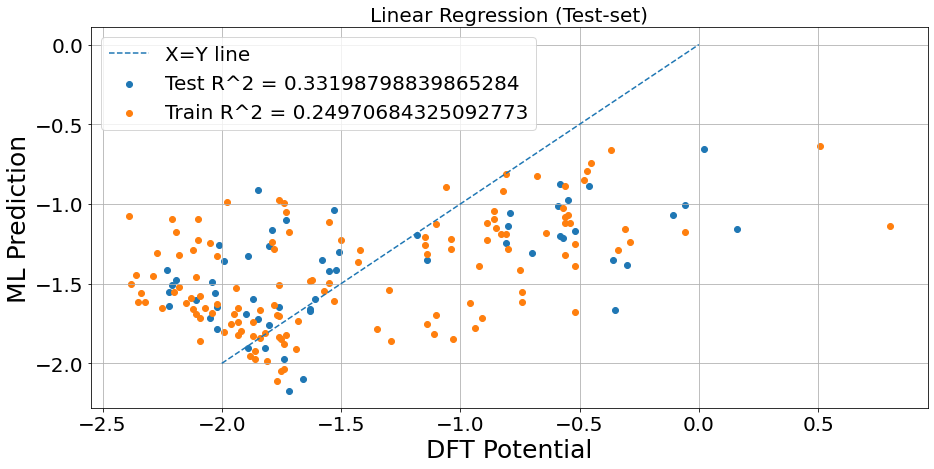

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

reg = LinearRegression().fit(X_train_scaled, y_train)

y_pred=reg.predict(X_test_scaled)
r2=r2_score(y_test,y_pred)

y_pred_train=reg.predict(X_train_scaled)
r2_train=r2_score(y_train,y_pred_train)

print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'Test R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title('Linear Regression (Test-set)')

plt.scatter(y_train,y_pred_train,label=f'Train R^2 = {r2_train}')

plt.legend()

### 2. SVR

R^2 = -0.010041883488186132


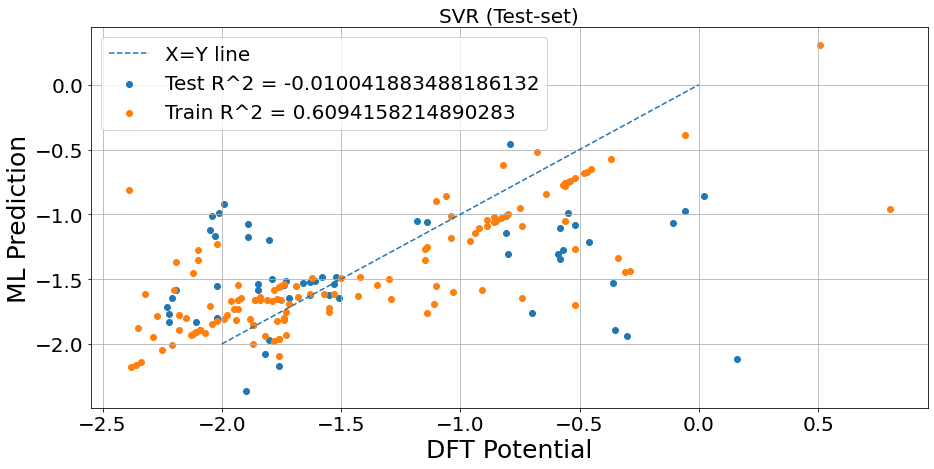

In [22]:
from sklearn.svm import SVR

svr=SVR(C=2, epsilon=0.2).fit(X_train_scaled, y_train)

y_pred=svr.predict(X_test_scaled)
r2=r2_score(y_test,y_pred)


y_pred_train=svr.predict(X_train_scaled)
r2_train=r2_score(y_train,y_pred_train)

print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'Test R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title('SVR (Test-set)')

plt.scatter(y_train,y_pred_train,label=f'Train R^2 = {r2_train}')

plt.legend()

### 3. Gradient Boosting Regression

R^2 = 0.9054057086490508


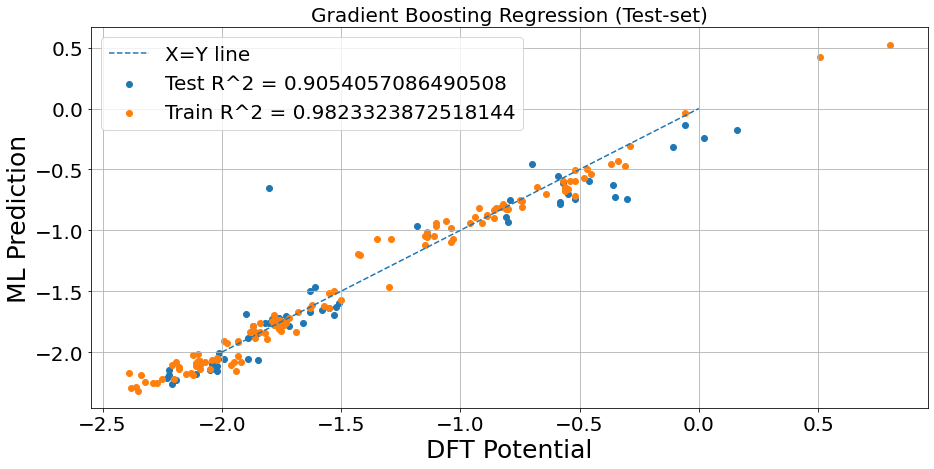

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor().fit(X_train_scaled, y_train)

y_pred=gbr.predict(X_test_scaled)
r2=r2_score(y_test,y_pred)

y_pred_train=gbr.predict(X_train_scaled)
r2_train=r2_score(y_train,y_pred_train)

print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'Test R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title('Gradient Boosting Regression (Test-set)')

plt.scatter(y_train,y_pred_train,label=f'Train R^2 = {r2_train}')

plt.legend()

## - Hyper-Parameter Tuning (Kernel Ridge Regression)

{'alpha': 0.0001, 'gamma': 1e-06, 'kernel': 'rbf'}
R^2 = 0.8718630995823003
R^2 = 0.9933324222162885


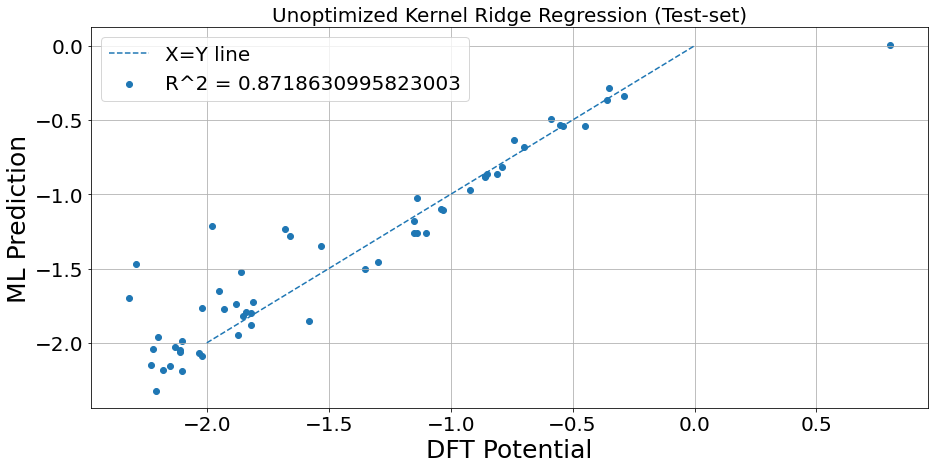

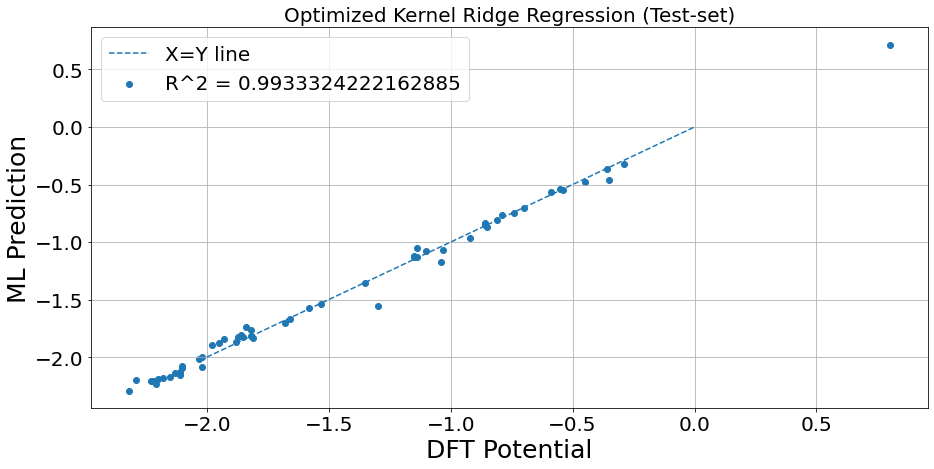

In [18]:
from IPython import display
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

param_grid={'kernel': ['chi2', 'linear','polynomial', 'rbf', 'laplacian', 'sigmoid', 'cosine'],
            'gamma': [1e-8,1e-7,1e-6,1e-5,1e-3, 1e-4],
            'alpha':np.linspace(1e-4,1,10)}

scoring = ['neg_mean_squared_error','r2']

estimator = KernelRidge()

krr_gs = GridSearchCV(estimator,
                  param_grid=param_grid,
                  scoring=scoring,
                  refit='neg_mean_squared_error',
                  return_train_score=True,
                  cv=10,
                  verbose=1,
                  n_jobs=-1
                 )
krr_gs.fit(X_train_scaled, y_train)
display.clear_output()
print(krr_gs.best_params_)

plt.figure()
krr_reg = KernelRidge(kernel='rbf').fit(X_train_scaled, y_train)
y_pred=krr_reg.predict(X_test_scaled)
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title('Unoptimized Kernel Ridge Regression (Test-set)')
plt.legend()

plt.figure()
y_pred=krr_gs.best_estimator_.predict(X_test_scaled)
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title('Optimized Kernel Ridge Regression (Test-set)')
plt.legend()

## Feature Importance

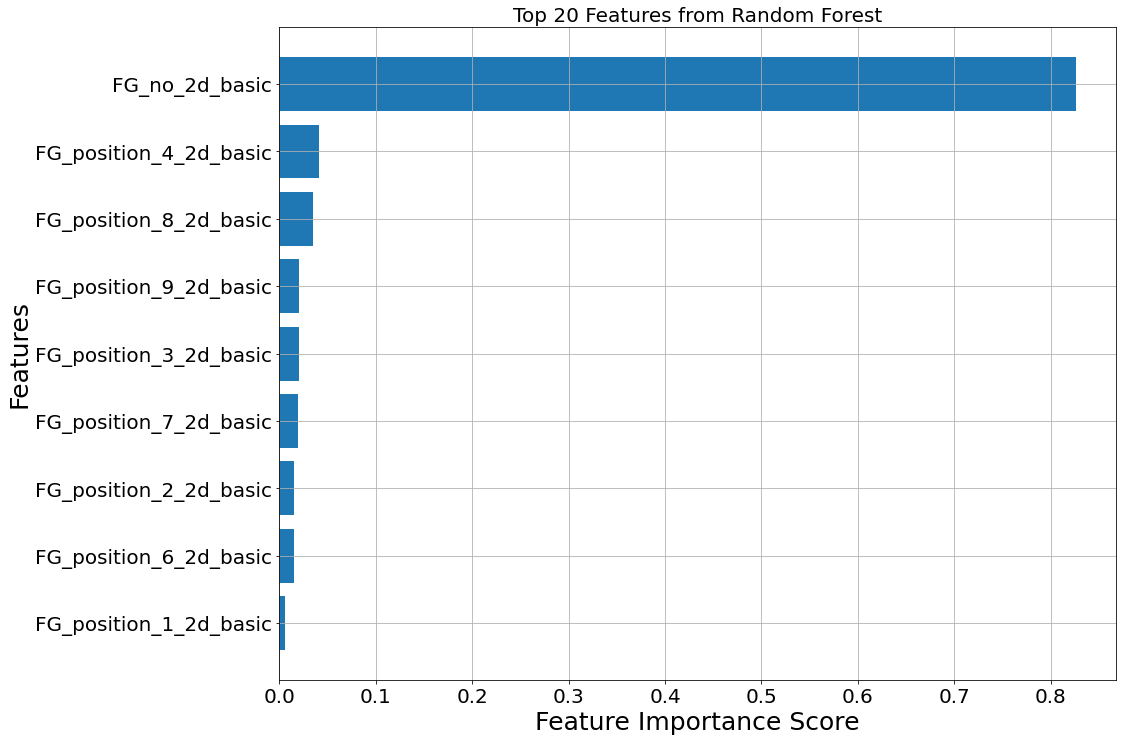

In [34]:
from sklearn.ensemble import RandomForestRegressor

feat_idx2name={idx:col for idx,col in enumerate(X_train.columns)}
feat_name2idx={col:idx for idx,col in enumerate(X_train.columns)}
feat_name_list=X_train.columns

ntop=20
rf_reg=RandomForestRegressor().fit(X_train_scaled, y_train)
rf_feat_score = rf_reg.feature_importances_
rf_feat_score_sorted_idx=rf_feat_score.argsort()
plt.figure(figsize=(15,12))
rf_top_features=list(map(lambda x:feat_idx2name[x],rf_feat_score_sorted_idx))
plt.barh(rf_top_features[-ntop:],rf_feat_score[rf_feat_score_sorted_idx][-ntop:])
plt.ylabel('Features')
plt.xlabel('Feature Importance Score')
plt.title('Top 20 Features from Random Forest')
plt.show()

## - Model Performance on Top 20 Features (CV)

(129, 9) (56, 9)
R^2 = -3.7394643975673567


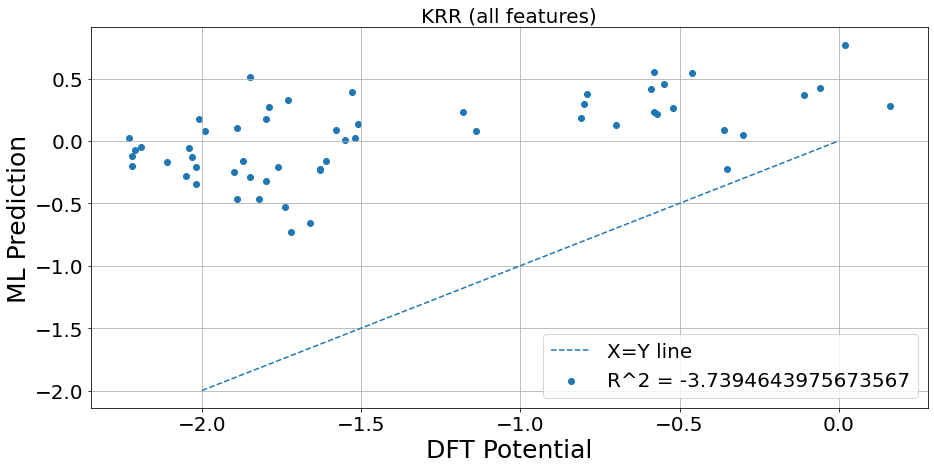

(129, 9) (56, 9)
R^2 = -3.7394643975674313


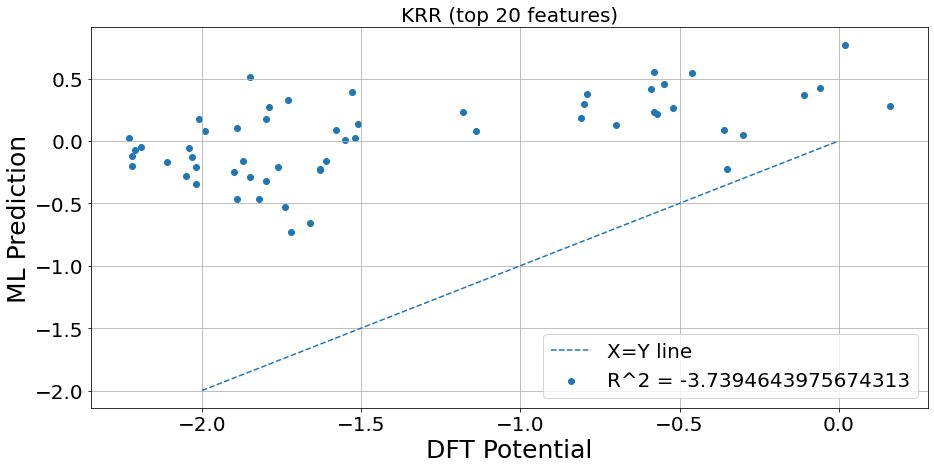

In [35]:
from sklearn.kernel_ridge import KernelRidge

print(X_train_scaled.shape,X_test_scaled.shape)
krr_reg=KernelRidge().fit(X_train_scaled, y_train)
y_pred=krr_reg.predict(X_test_scaled)
y_true=y_test
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title(f'KRR (all features)')
plt.legend()
plt.show()

plt.figure()
ntop=20
rf_top_features_idx=list(map(lambda x:feat_name2idx[x],rf_top_features))
_X_train,_X_test=X_train_scaled[:,rf_top_features_idx[-ntop:]],X_test_scaled[:,rf_top_features_idx[-ntop:]]
print(_X_train.shape,_X_test.shape)
krr_reg =KernelRidge().fit(_X_train, y_train)
y_pred=krr_reg.predict(_X_test)
y_true=y_test
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title(f'KRR (top 20 features)')
plt.legend()


# Multiple Models

## Unoptimized Models

In [60]:
# %%time
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Ridge
# from sklearn.linear_model import Lasso
# from sklearn.linear_model import MultiTaskLasso
# from sklearn.linear_model import ElasticNet
# from sklearn.linear_model import MultiTaskElasticNet
# from sklearn.linear_model import Lars
# from sklearn.linear_model import LassoLars
# from sklearn.linear_model import OrthogonalMatchingPursuit
# from sklearn.linear_model import BayesianRidge
# from sklearn.linear_model import ARDRegression
# from sklearn.linear_model import PassiveAggressiveRegressor
# from sklearn.linear_model import RANSACRegressor
# from sklearn.linear_model import HuberRegressor
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import Pipeline
# from sklearn.kernel_ridge import KernelRidge
# from sklearn.svm import SVR
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import ConstantKernel,DotProduct, WhiteKernel,RBF, WhiteKernel, RationalQuadratic, ExpSineSquared
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import BaggingRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.experimental import enable_hist_gradient_boosting
# from sklearn.ensemble import HistGradientBoostingRegressor
# from sklearn.neural_network import MLPRegressor
# from sklearn.neighbors import KNeighborsRegressor

# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score

# models_dict_unopt={'linear_reg':LinearRegression(),
#              'ridge':Ridge(),
#              'lasso':Lasso(),
# #              'multitask_lasso':MultiTaskLasso(),
#              'elastic_net':ElasticNet(),
# #              'multitask_elastic_net':MultiTaskElasticNet(),
# #              'lars':Lars(n_nonzero_coefs=50),
#              'lasso_lars':LassoLars(),
#              'omp':OrthogonalMatchingPursuit(),
#              'bayesian_ridge':BayesianRidge(),
#              'ARDR':ARDRegression(),
#              'PA':PassiveAggressiveRegressor(),
# #              'RANSAC':RANSACRegressor(min_samples=129)),
#              'huber':HuberRegressor(epsilon=1,
#                                      alpha=1e-3,
#                                      tol=1e-6,
#                                      max_iter=50000),
# #              'polynomial_features':Pipeline([('poly', PolynomialFeatures(degree=3)),
# #                                                ('linear', LinearRegression(fit_intercept=True))]),
#              'kernel_ridge':KernelRidge(kernel='rbf'),
#              'SVR':SVR(),
#              'gaussian_process':GaussianProcessRegressor(kernel=DotProduct() + WhiteKernel()),
#              'decision_tree':DecisionTreeRegressor(),
#              'bagging':BaggingRegressor(n_jobs=-1),
#              'random_forest':RandomForestRegressor(),
#              'ada_boost':AdaBoostRegressor(),
#              'gradient_boosting_reg':GradientBoostingRegressor(),
# #              'hist_gradient_boosting_reg':HistGradientBoostingRegressor(),
#              'neural_network':MLPRegressor(hidden_layer_sizes=(50,20),
#                                             max_iter=10000),
#              'knn_reg':KNeighborsRegressor()
#             }

# num_folds=10
# cv_results_all_feat_unopt={'model_name':[],'mse_cv':[],'mse_testset':[]}
# pbar=tqdm(models_dict_unopt.items())
# for model_name,model in pbar:
#     pbar.set_description(model_name)
#     scores=cross_val_score(model,
#                            X_train_scaled,
#                            y_train,
#                            cv=num_folds,
#                            scoring='neg_mean_squared_error',
#                            n_jobs=-1
#                           )
#     mean_score=-scores.mean()
#     reg_model = model.fit(X_train_scaled, y_train)
#     y_pred=reg_model.predict(X_test_scaled)
#     mse_testset=mean_squared_error(y_test, y_pred)
#     cv_results_all_feat_unopt['model_name'].append(model_name)
#     cv_results_all_feat_unopt['mse_cv'].append(mean_score)
#     cv_results_all_feat_unopt['mse_testset'].append(mse_testset)

# print(f'Total Models = {len(models_dict_unopt)}')
# df=pd.DataFrame.from_dict(cv_results_all_feat_unopt)
# df=df.sort_values('mse_cv',ascending=False)
# plt.figure(figsize=(16,13))
# plt.barh(df['model_name'],df['mse_cv'])
# plt.xlabel('MSE')
# plt.ylabel('Models')
# plt.title('Unoptimized Cross-Validation Model Performance (all features)')
# plt.figure(figsize=(16,13))
# plt.barh(df['model_name'],df['mse_testset'])
# plt.xlabel('MSE')
# plt.ylabel('Models')
# plt.title('Unoptimized Model Performance on Test-Set (all features)')

## Optimized Models (Hyper-parameter Tuning)

In [45]:
%%time
from IPython.display import clear_output
from sklearn.model_selection import GridSearchCV

param_grid_dict={'linear_reg':{},
             'ridge':{'alpha':[0.5,1,1.5],
                      'tol':[1e-3,1e-4,1e-5],
                      'max_iter':[500,1000,5000],
                      'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
                     },
             'lasso':{'alpha':[1e-2,0.1,0.2,0.5,0.8,1],
                      'positive':[True,False],
                      'tol':[1e-4,1e-5,1e-6,1e-7],
                      'max_iter':[100,200,500,1000],
                     },
#              'multitask_lasso':MultiTaskLasso(),
             'elastic_net':{'alpha':[0.5,1,1.5],
                            'l1_ratio':[0.2,0.5,0.8],
                            'positive':[True,False],
                            'tol':[1e-3,1e-4,1e-5],
                            'max_iter':[500,1000,5000]
                           },
#              'multitask_elastic_net':MultiTaskElasticNet(),
#              'lars':Lars(n_nonzero_coefs=50),
             'lasso_lars':{'alpha':[1e-2,0.1,0.2,0.5,0.8,1],
                            'jitter':[None,0.1,1,10,100],
                            'positive':[True,False],
                            'max_iter':[100,200,500,1000],
                           },
             'omp':{#'n_nonzero_coefs':[None,5,10,20],
#                   'tol':[0.1,0.01,1e-3,1e-4,1e-5,1e-6,1e-7]
                   },
             'bayesian_ridge':{'n_iter':[200,300,500],
                               'tol':[1e-2,1e-3,1e-4],
                               'alpha_1':[1e-5,1e-6,1e-7],
                               'alpha_2':[1e-5,1e-6,1e-7],
                               'lambda_1':[1e-5,1e-6,1e-7],
                               'lambda_2':[1e-5,1e-6,1e-7],
                              },
             'ARDR':{'n_iter':[200,300,500],
                     'tol':[1e-2,1e-3,1e-4],
                     'alpha_1':[1e-5,1e-6,1e-7],
#                      'alpha_2':[1e-5,1e-6,1e-7],
                     'lambda_1':[1e-5,1e-6,1e-7],
#                      'lambda_2':[1e-5,1e-6,1e-7],
#                      'threshold_lambda':[5000,10000,20000]
                    },
             'PA':{'C':[0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.15],
                   'max_iter':[100,200,500,1000,1500,2000],
                   'tol':[1e-5,1e-6,1e-7,1e-8],
#                    'early_stopping':[True,False],
#                    'average':[True,False],
#                    'validation_fraction':[0.05,0.1,0.2]
                  },
#              'RANSAC':RANSACRegressor(min_samples=129)),
             'huber':{'epsilon':[1,1.35,1.5],
                      'alpha':[1e-3,1e-4,1e-5],
                      'tol':[1e-5,1e-6,1e-7],
                      'max_iter':[1000,50000]
                     },
#              'polynomial_features':Pipeline([('poly', PolynomialFeatures(degree=3)),
#                                                ('linear', LinearRegression(fit_intercept=True))]),
             'kernel_ridge':{'kernel': ['chi2', 'linear','polynomial', 'rbf', 'laplacian', 'sigmoid', 'cosine'],
                             'gamma': [1e-8,1e-7,1e-6,1e-5,1e-3, 1e-4],
                             'alpha':[0.01,0.1,1,5,10,100]
                            },
             'SVR':{'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
                    'C':[0.5,1,1.5],
                    'tol':[1e-2,1e-3,1e-4],
                    'gamma':['scale','auto']
                   },
             'gaussian_process':{'kernel':[DotProduct()+WhiteKernel(),
                                           RBF()+WhiteKernel(),
                                           34.4**2 * RBF(length_scale=41.8)
                                            + 3.27**2 * RBF() * ExpSineSquared()
                                            + 0.446**2 * RationalQuadratic(alpha=17.7, length_scale=0.957)
                                            + 0.197**2 * RBF(length_scale=0.138) + WhiteKernel(noise_level=0.0336),
                                           ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0)) * RBF(length_scale=0.5, length_scale_bounds=(0.0, 10.0)) + RBF(length_scale=2.0, length_scale_bounds=(0.0, 10.0))
                                          ],
                                 'alpha':[1e-9,1e-10,1e-11]
                                },
             'decision_tree':{#'criterion':['mse', 'friedman_mse', 'mae', 'poisson'],
#                               'splitter':['best','random'],
#                               'max_features':['auto', 'sqrt', 'log2'],
#                               'ccp_alpha':[-1,0,0.1,0.5,1],
                              'max_depth':[None,10,20,50,100,200]
                             },
             'bagging':{'n_estimators': np.arange(50,1000,50),
                        'bootstrap':[True,False],
                        'bootstrap_features':[True,False],
                        'oob_score':[True,False]
                       },
             'random_forest':{'n_estimators': np.arange(50,501,50),
                              'bootstrap':[True,False],
                              'oob_score':[True,False],
#                               'criterion':['mse', 'mae'],
#                               'max_features':['auto', 'sqrt', 'log2'],
#                               'ccp_alpha':[0,0.5,1]
                              },
             'ada_boost':{'n_estimators': np.arange(50,501,50),
                          'learning_rate':[0.5,1,1.5],
                          'loss':['linear', 'square', 'exponential']
                         },
             'gradient_boosting_reg':{#'loss':['ls', 'lad', 'huber', 'quantile'],
#                                       'learning_rate':[0.5,1,1.5],
                                      'n_estimators': np.arange(50,501,50),
#                                       'criterion':['friedman_mse', 'mse', 'mae'],
                                      'max_depth':[2,3,10,20,50],
#                                       'max_features':['auto', 'sqrt', 'log2'],
#                                       'alpha':[0.6,0.9,1.2],
                                      'tol':[1e-2,1e-3,1e-4],
#                                       'ccp_alpha':[0.5,1,1.5]
                                     },
#              'hist_gradient_boosting_reg':{},
             'neural_network':{'hidden_layer_sizes':[(10,10,10),(50,30,20),(80,60,30)],
                               'activation':['identity', 'logistic', 'tanh', 'relu'],
                               'solver':['lbfgs', 'sgd', 'adam'],
                               'learning_rate':['constant', 'invscaling', 'adaptive'],
                               'early_stopping':[True,False]
                              },
             'knn_reg':{'n_neighbors':np.arange(1,10,2),
                        'weights':['uniform', 'distance'],
                        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size':[40,50,75]
                       }
            }

gs_results_dict={'model_name':[],
              'r2_unopt':[],'r2_opt':[],
              'mse_unopt':[],'mse_opt':[],
              'best_model_type':[],
              'opt_params':[],
              'best_model':[]
             }
scoring = ['neg_mean_squared_error','r2']
# test_model='PA'
# for model_name,param_grid in [(test_model,param_grid_dict[test_model])]:
for model_name,param_grid in param_grid_dict.items():
    print(model_name)
    unopt_estimator=models_dict_unopt[model_name]
    gs = GridSearchCV(unopt_estimator,
                  param_grid=param_grid,
                  scoring=scoring,
                  refit='neg_mean_squared_error',
                  return_train_score=False,
                  cv=10,
                  verbose=2,
                  n_jobs=-1
                 )
    gs.fit(X_train_scaled, y_train)
    #unopt
#     unopt_estimator=unopt_estimator.fit(X_train_scaled, y_train)
#     y_pred_unopt=unopt_estimator.predict(X_test_scaled)
#     mse_unopt=mean_squared_error(y_test,y_pred_unopt)
#     r2_unopt=r2_score(y_test,y_pred_unopt)
    #opt
    opt_estimator=gs.best_estimator_
    y_pred_opt=opt_estimator.predict(X_test_scaled)
    mse_opt=mean_squared_error(y_test,y_pred_opt)
    r2_opt=r2_score(y_test,y_pred_opt)
    #data
    gs_results_dict['model_name'].append(model_name)
#     gs_results_dict['mse_unopt'].append(mse_unopt)
#     gs_results_dict['r2_unopt'].append(r2_unopt)
    gs_results_dict['mse_opt'].append(mse_opt)
    gs_results_dict['r2_opt'].append(r2_opt)
    best_model_type='opt' if r2_opt>r2_unopt else 'unopt'
    best_model=opt_estimator if r2_opt>r2_unopt else unopt_estimator
    gs_results_dict['best_model_type'].append(best_model_type)
    gs_results_dict['opt_params'].append(gs.best_params_)
    gs_results_dict['best_model'].append(best_model)
    print(r2_unopt,r2_opt)
    
clear_output()
model_opt_data_df=pd.DataFrame.from_dict(gs_results_dict)

import pickle
with open('MODEL_OPT_DATA_DF.pkl','wb') as outfile:
    pickle.dump(model_opt_data_df,outfile)

print(f'Total Models = {model_opt_data_df.shape[0]}')
model_opt_data_df

Total Models = 20
CPU times: user 1min 6s, sys: 25.3 s, total: 1min 31s
Wall time: 4min 3s


,model_name,r2_unopt,r2_opt,mse_unopt,mse_opt,best_model_type,opt_params,best_model
0,linear_reg,0.331988,0.331988,0.326242,0.326242,unopt,{},LinearRegression()
1,ridge,0.331376,0.331353,0.326542,0.326553,unopt,"{'alpha': 1.5, 'max_iter': 500, 'solver': 'lsq...",Ridge()
2,lasso,-0.006365,0.198455,0.491486,0.391457,opt,"{'alpha': 0.1, 'max_iter': 100, 'positive': Fa...","Lasso(alpha=0.1, max_iter=100)"
3,elastic_net,-0.006365,0.151859,0.491486,0.414213,opt,"{'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...","ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=5..."
4,lasso_lars,-0.006365,0.180787,0.491486,0.400086,opt,"{'alpha': 0.01, 'jitter': None, 'max_iter': 10...","LassoLars(alpha=0.01, max_iter=100)"
5,omp,0.160504,0.160504,0.409992,0.409992,unopt,{},OrthogonalMatchingPursuit()
6,bayesian_ridge,0.301399,0.301504,0.341181,0.341130,opt,"{'alpha_1': 1e-07, 'alpha_2': 1e-05, 'lambda_1...","BayesianRidge(alpha_1=1e-07, alpha_2=1e-05, la..."
7,ARDR,0.298479,0.298487,0.342607,0.342603,opt,"{'alpha_1': 1e-07, 'lambda_1': 1e-05, 'n_iter'...","ARDRegression(alpha_1=1e-07, lambda_1=1e-05, n..."
8,PA,0.210776,-0.217460,0.385440,0.594581,unopt,"{'C': 0.6, 'max_iter': 200, 'tol': 1e-08}",PassiveAggressiveRegressor()
9,huber,0.237248,0.256774,0.372511,0.362975,opt,"{'alpha': 0.001, 'epsilon': 1.5, 'max_iter': 1...","HuberRegressor(alpha=0.001, epsilon=1.5, max_i..."


knn_reg: : 20it [00:07,  2.62it/s]              

CPU times: user 3.03 s, sys: 14.8 s, total: 17.8 s
Wall time: 7.7 s


Text(0.5, 1.0, 'Optimized Model Performance on Test-Set (all features)')

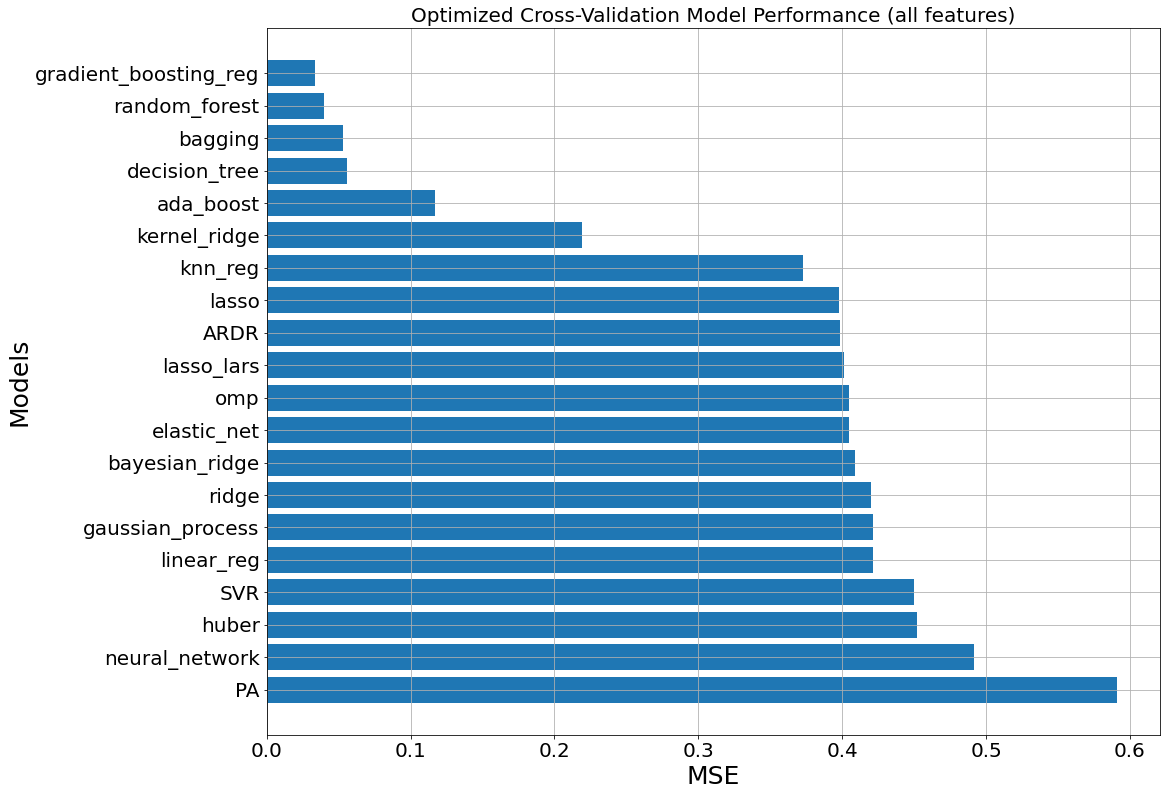

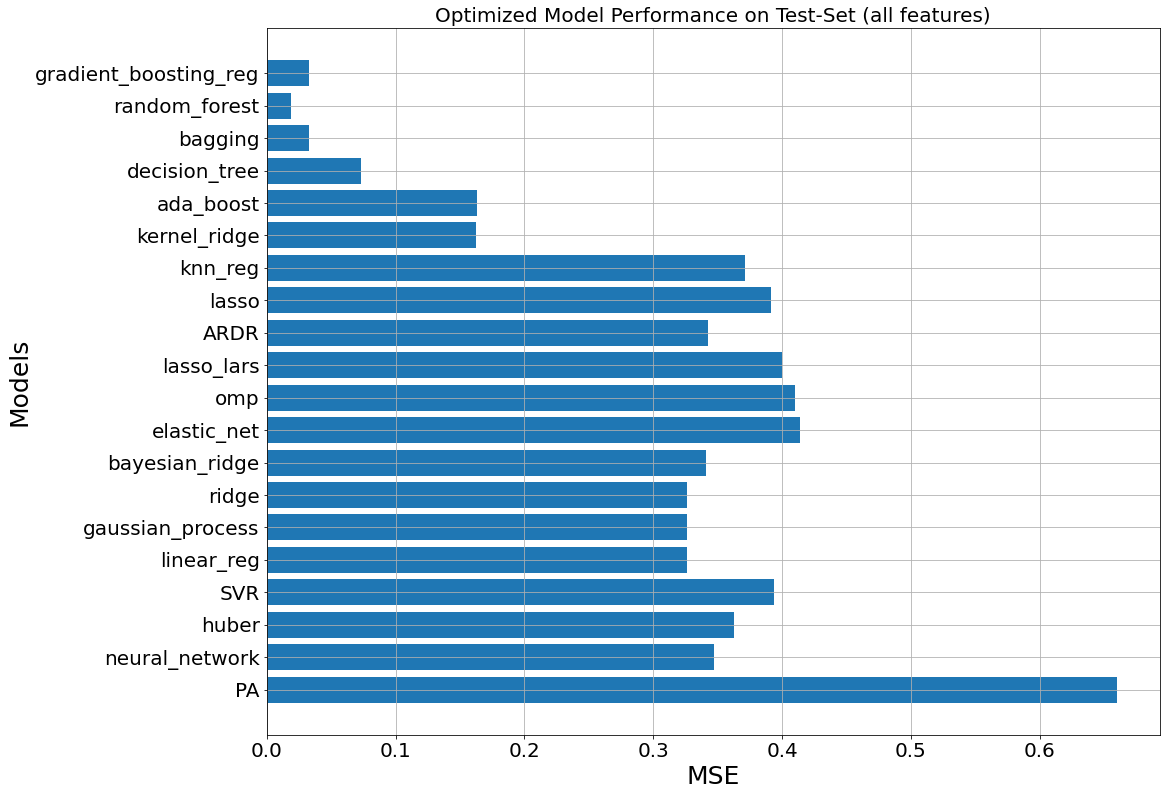

In [46]:
%%time
num_folds=10
cv_results_all_feat_opt={'model_name':[],'mse_cv':[],'mse_testset':[]}
pbar=tqdm(model_opt_data_df.iterrows())
for idx,row in pbar:
    model_name=row['model_name']
    pbar.set_description(model_name)
    model=row['best_model']
    scores=cross_val_score(model,
                           X_train_scaled,
                           y_train,
                           cv=num_folds,
                           scoring='neg_mean_squared_error',
                           n_jobs=30
                          )
    mean_score=-scores.mean()
    reg_model = model.fit(X_train_scaled, y_train)
    y_pred=reg_model.predict(X_test_scaled)
    mse_testset=mean_squared_error(y_test, y_pred)
    cv_results_all_feat_opt['model_name'].append(model_name)
    cv_results_all_feat_opt['mse_cv'].append(mean_score)
    cv_results_all_feat_opt['mse_testset'].append(mse_testset)

df=pd.DataFrame.from_dict(cv_results_all_feat_opt)
df=df.sort_values('mse_cv',ascending=False)
plt.figure(figsize=(16,13))
plt.barh(df['model_name'],df['mse_cv'])
plt.xlabel('MSE')
plt.ylabel('Models')
plt.title('Optimized Cross-Validation Model Performance (all features)')
plt.figure(figsize=(16,13))
plt.barh(df['model_name'],df['mse_testset'])
plt.xlabel('MSE')
plt.ylabel('Models')
plt.title('Optimized Model Performance on Test-Set (all features)')

Text(0, 0.5, '% Absolute Error')

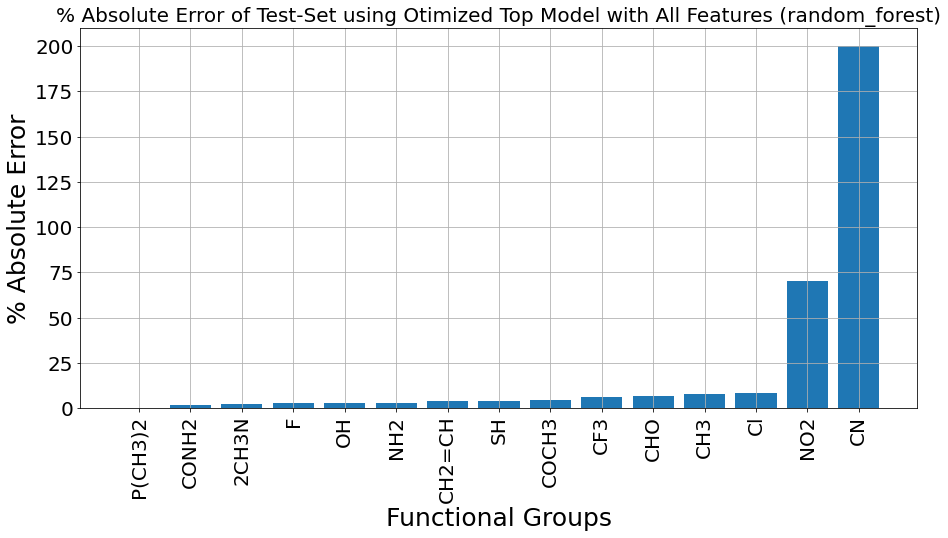

In [61]:
#***ONLY BEST MODEL***
top_model=model_opt_data_df.iloc[model_opt_data_df['mse_opt'].argmin()]['best_model']
top_model_name=model_opt_data_df.iloc[model_opt_data_df['mse_opt'].argmin()]['model_name']

# top_model_name='lasso'
# top_model=model_opt_data_df[model_opt_data_df['model_name']==top_model_name]['best_model'].values[0]
top_model.fit(X_train_scaled,y_train)
y_pred=top_model.predict(X_test_scaled)
_data_test=data_test.copy()
_data_test['pred_redox_potential']=y_pred
_data_test['%_absolute_error']=np.abs((_data_test['pred_redox_potential']-
                                      _data_test['Redox Potential'])*100/
                                      _data_test['Redox Potential']
                                     )
gb=_data_test.groupby('FG_name').mean().sort_values(by='%_absolute_error')
plt.bar(gb.index,gb['%_absolute_error'])
plt.xticks(rotation=90)
plt.xlabel('Functional Groups')
plt.title(f'% Absolute Error of Test-Set using Otimized Top Model with All Features ({top_model_name})')
plt.ylabel('% Absolute Error')

# Feature Importance

In [47]:
feat_idx2name={idx:col for idx,col in enumerate(X_train.columns)}
feat_name2idx={col:idx for idx,col in enumerate(X_train.columns)}
feat_name_list=X_train.columns

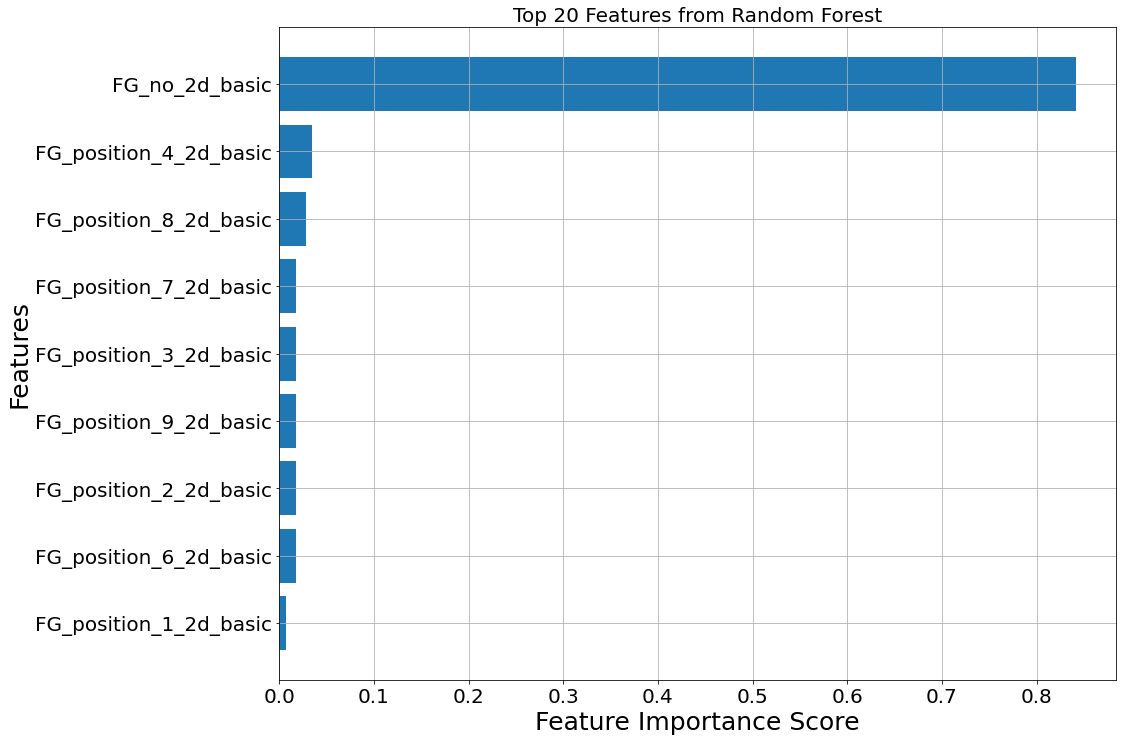

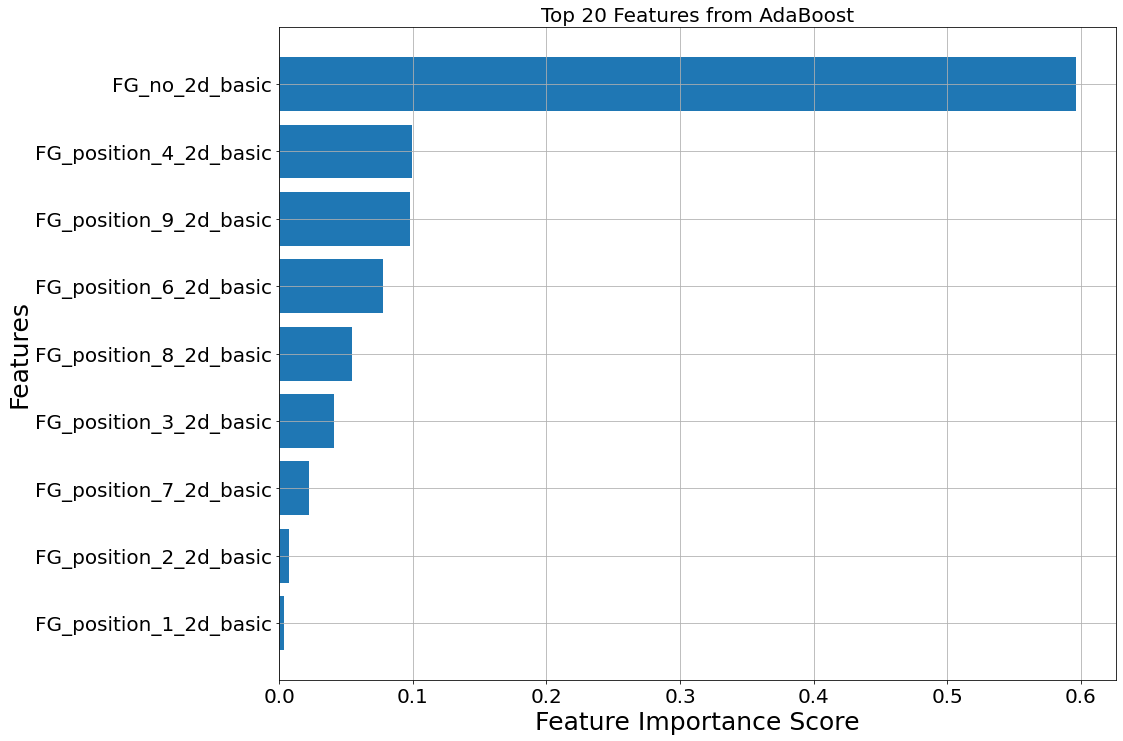

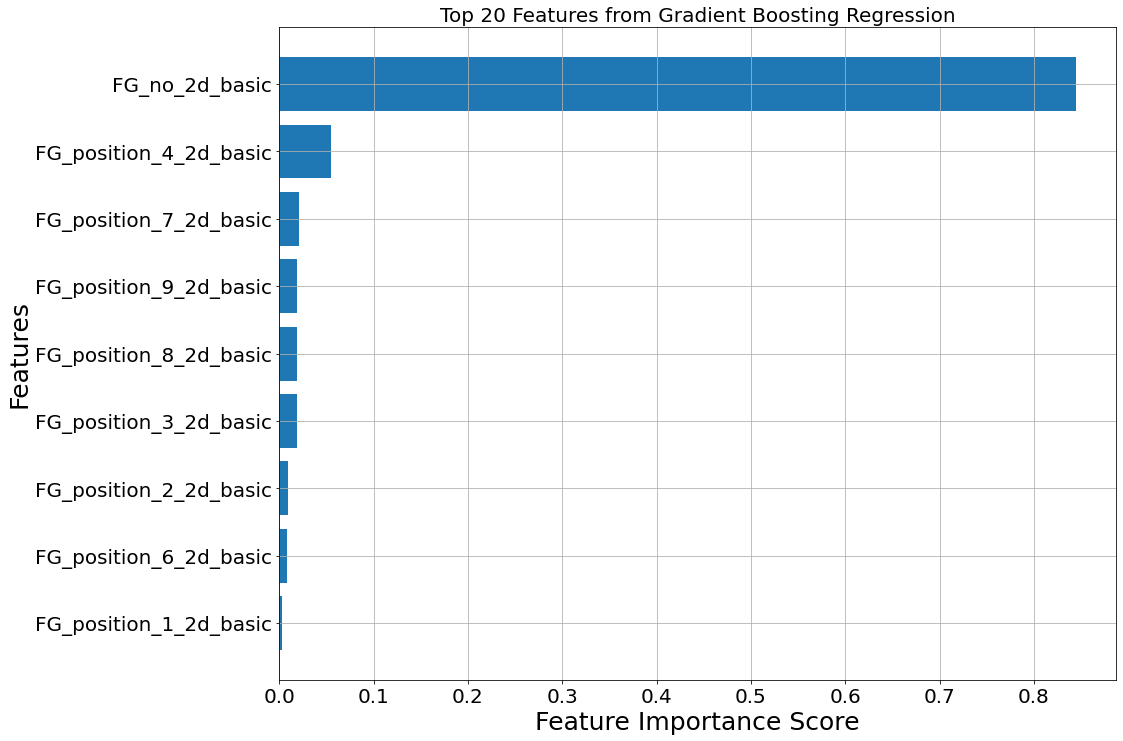

In [48]:
feat_imp_dict={}

ntop=20
rf_reg=model_opt_data_df[model_opt_data_df['model_name']=='random_forest']['best_model'].values[0]
rf_feat_score = rf_reg.feature_importances_
rf_feat_score_sorted_idx=rf_feat_score.argsort()
feat_imp_dict['random_forest_opt']=rf_feat_score_sorted_idx
plt.figure(figsize=(15,12))
rf_top_features=list(map(lambda x:feat_idx2name[x],rf_feat_score_sorted_idx))
plt.barh(rf_top_features[-ntop:],rf_feat_score[rf_feat_score_sorted_idx][-ntop:])
plt.ylabel('Features')
plt.xlabel('Feature Importance Score')
plt.title('Top 20 Features from Random Forest')
plt.show()


adaboost_reg=model_opt_data_df[model_opt_data_df['model_name']=='ada_boost']['best_model'].values[0]      
feat_score = adaboost_reg.feature_importances_
feat_score_sorted_idx=feat_score.argsort()
feat_imp_dict['ada_boost_opt']=feat_score_sorted_idx
plt.figure(figsize=(15,12))
features=list(map(lambda x:feat_idx2name[x],feat_score_sorted_idx))
plt.barh(features[-ntop:],feat_score[feat_score_sorted_idx][-ntop:])
plt.ylabel('Features')
plt.xlabel('Feature Importance Score')
plt.title('Top 20 Features from AdaBoost')
plt.show()

gbt_reg=model_opt_data_df[model_opt_data_df['model_name']=='gradient_boosting_reg']['best_model'].values[0]      
feat_score = gbt_reg.feature_importances_
feat_score_sorted_idx=feat_score.argsort()
feat_imp_dict['gradient_boosting_reg_opt']=feat_score_sorted_idx
plt.figure(figsize=(15,12))
features=list(map(lambda x:feat_idx2name[x],feat_score_sorted_idx))
plt.barh(features[-ntop:],feat_score[feat_score_sorted_idx][-ntop:])
plt.ylabel('Features')
plt.xlabel('Feature Importance Score')
plt.title('Top 20 Features from Gradient Boosting Regression')
plt.show()

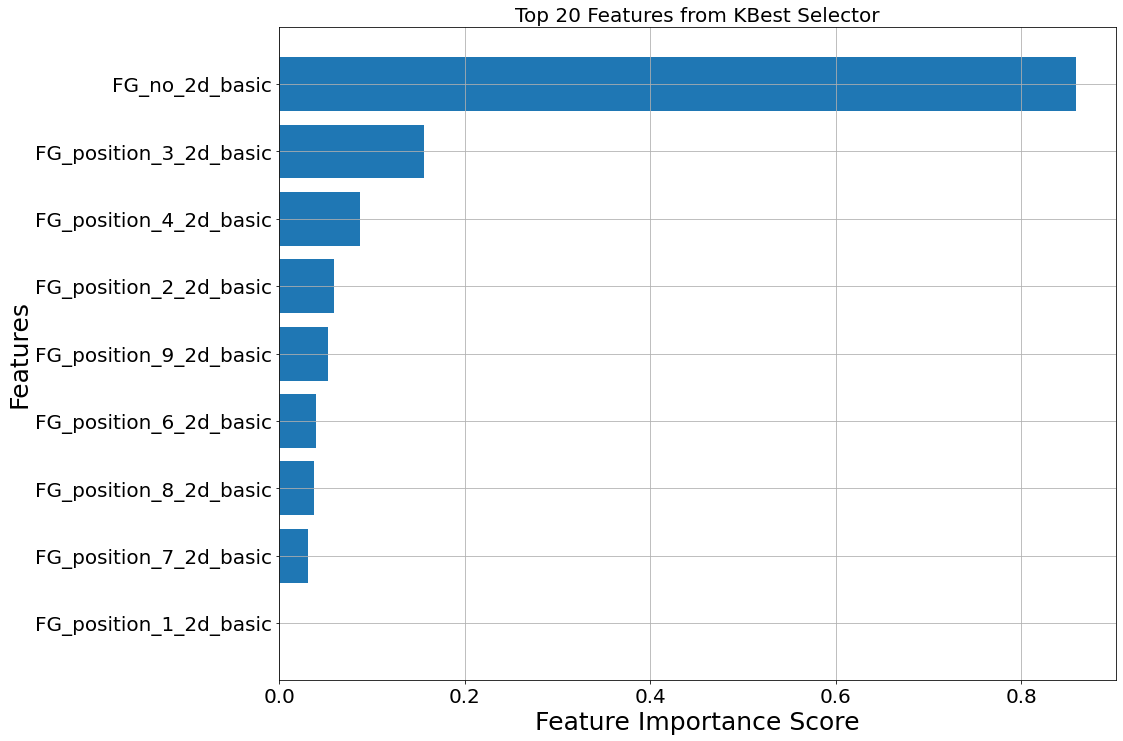

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,mutual_info_regression

kbest_selector=SelectKBest(mutual_info_regression,k='all').fit(X_train_scaled, y_train)
feat_score=kbest_selector.scores_
feat_score_sorted_idx=feat_score.argsort()
feat_imp_dict['kbest_selector']=feat_score_sorted_idx

ntop=20
plt.figure(figsize=(15,12))
features=list(map(lambda x:feat_idx2name[x],feat_score_sorted_idx))
plt.barh(features[-ntop:],feat_score[feat_score_sorted_idx][-ntop:])
plt.ylabel('Features')
plt.xlabel('Feature Importance Score')
plt.title('Top 20 Features from KBest Selector')
plt.show()

knn_reg: : 20it [00:05,  3.93it/s]              


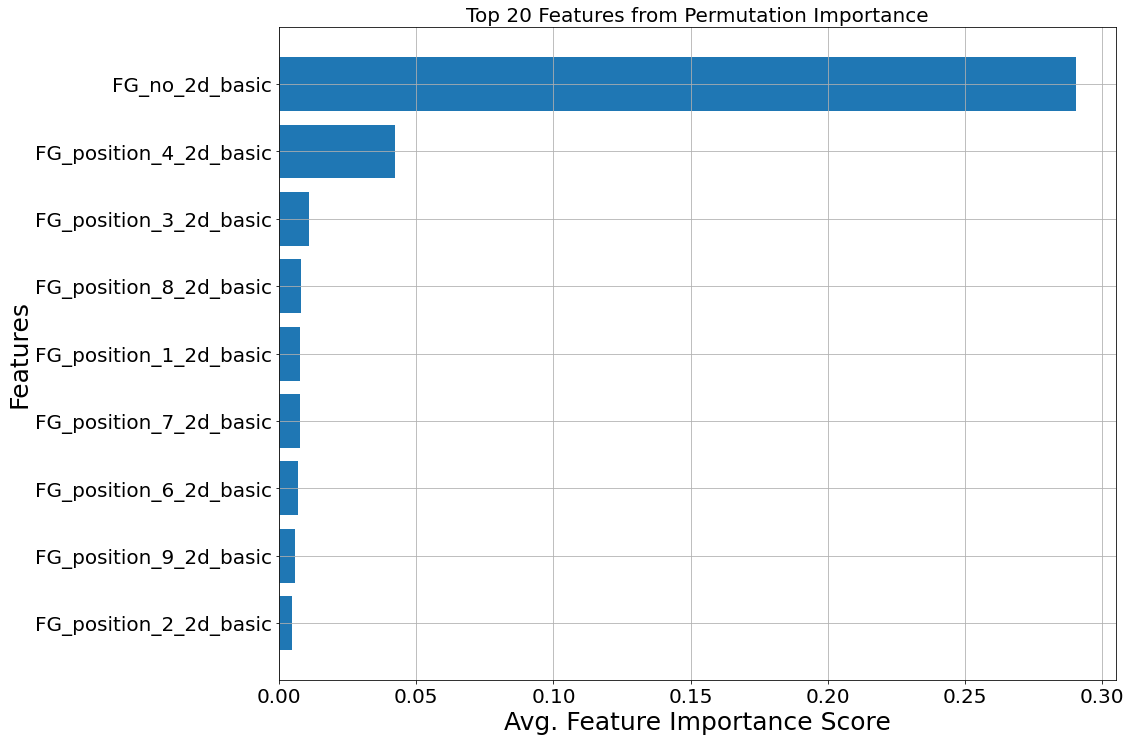

CPU times: user 2.31 s, sys: 6.15 s, total: 8.46 s
Wall time: 5.36 s


In [51]:
%%time
from sklearn.inspection import permutation_importance

pbar=tqdm(model_opt_data_df.iterrows())
avg_feat_score=[]
for idx,row in pbar:
    model_name=row['model_name']
    pbar.set_description(model_name)
    estimator=row['best_model']
    selector = permutation_importance(estimator,
                                      X_train_scaled, y_train,
                                      scoring='neg_mean_squared_error',
                                      n_jobs=10)
    feat_score=selector.importances_mean
    avg_feat_score.append(feat_score)
    feat_score_sorted_idx=feat_score.argsort()[::-1]
    feat_imp_dict[f'{model_name}_perm_imp']=feat_score_sorted_idx
avg_feat_score=np.array(avg_feat_score).mean(axis=0)
feat_score_sorted_idx=avg_feat_score.argsort()
plt.figure(figsize=(15,12))
features=list(map(lambda x:feat_idx2name[x],feat_score_sorted_idx))
plt.barh(features[-ntop:],avg_feat_score[feat_score_sorted_idx][-ntop:])
plt.ylabel('Features')
plt.xlabel('Avg. Feature Importance Score')
plt.title('Top 20 Features from Permutation Importance')
plt.show()

In [26]:
# %%time
# from sklearn.feature_selection import RFECV

# pbar=tqdm(model_opt_data_df.iterrows())
# for idx,row in pbar:
#     model_name=row['model_name']
#     pbar.set_description(model_name)
#     if model_name in ['huber','kernel_ridge','gaussian_process','bagging','neural_network','knn_reg']:
#         continue
#     estimator=row['best_model']
#     selector = RFECV(estimator,
#                      scoring='neg_mean_squared_error',
#                      cv=10,
#                      n_jobs=-1)
#     selector = selector.fit(X_train_scaled, y_train)
#     feat_score=selector.ranking_
#     feat_score_sorted_idx=feat_score.argsort()
#     feat_imp_dict[f'{model_name}_rfecv']=feat_score_sorted_idx



# feat_imp_df=pd.DataFrame.from_dict(feat_imp_dict)
# feat_imp_df
# from scipy import stats

# rfecv_cols=[col for col in feat_imp_df.columns if 'rfecv' in col]

# feat_ranking=[]
# for idx,row in feat_imp_df[rfecv_cols].iterrows():
#     mode=row.mode().values
#     feat=None
#     if len(mode)==1:
#         feat=mode[0]
#     else:
#         feat=row['random_forest_rfecv']
#     feat_ranking.append(feat)
# features=list(map(lambda x:feat_idx2name[x],feat_ranking))
# features[:20]

# perm_imp_cols=[col for col in feat_imp_df.columns if 'perm_imp' in col]

# feat_ranking=[]
# for idx,row in feat_imp_df[perm_imp_cols].iterrows():
#     mode=row.mode().values
#     feat=None
#     if len(mode)==1:
#         feat=mode[0]
#     else:
#         feat=row['random_forest_perm_imp']
#     feat_ranking.append(feat)
# features=list(map(lambda x:feat_idx2name[x],feat_ranking))
# features[:22]

# Top 20 features (re-train optimized models)

linear_reg: : 0it [00:00, ?it/s]

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.44 µs


knn_reg: : 20it [00:14,  1.42it/s]              


Text(0.5, 1.0, 'Optimized Model Performance on Test-Set (top 20 features)')

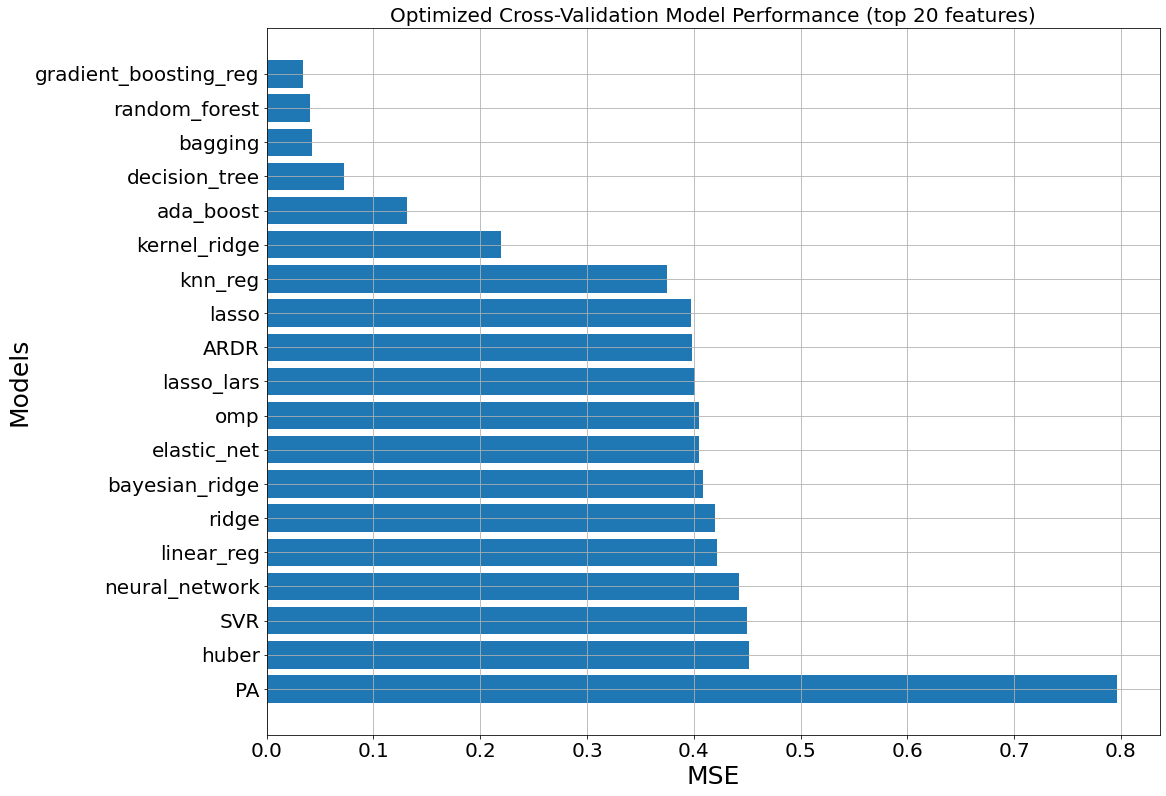

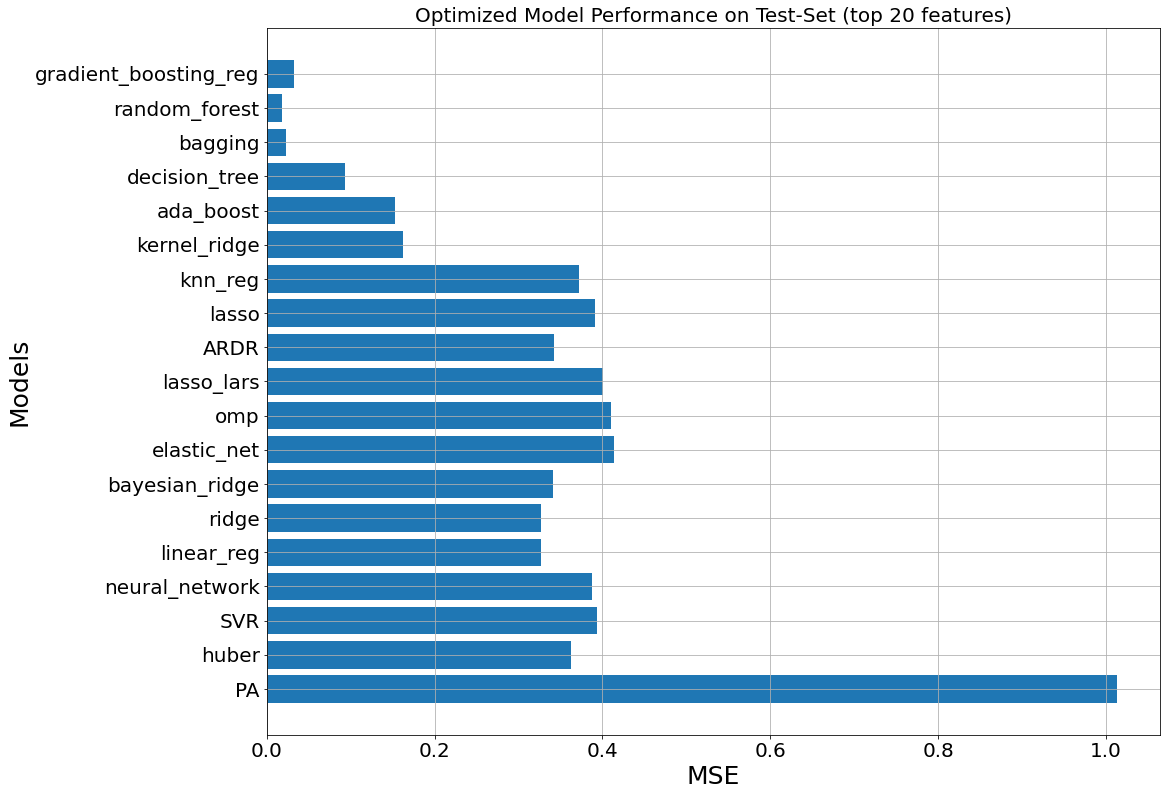

In [52]:
%time
ntop=20
rf_top_features_idx=list(map(lambda x:feat_name2idx[x],rf_top_features))
_X_train_scaled,_X_test_scaled=X_train_scaled[:,rf_top_features_idx[-ntop:]],X_test_scaled[:,rf_top_features_idx[-ntop:]]
num_folds=10
cv_results_less_feat_opt={'model_name':[],'mse_cv':[],'mse_testset':[]}
_model_opt_data_df=model_opt_data_df.copy()
pbar=tqdm(_model_opt_data_df.iterrows())
for idx,row in pbar:
    model_name=row['model_name']
    pbar.set_description(model_name)
    if model_name in ['gaussian_process']:
        continue
    model=row['best_model']
    scores=cross_val_score(model,
                           _X_train_scaled,
                           y_train,
                           cv=num_folds,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1
                          )
    mean_score=-scores.mean()
    reg_model = model.fit(_X_train_scaled, y_train)
    y_pred=reg_model.predict(_X_test_scaled)
    mse_testset=mean_squared_error(y_test, y_pred)
    cv_results_less_feat_opt['model_name'].append(model_name)
    cv_results_less_feat_opt['mse_cv'].append(mean_score)
    cv_results_less_feat_opt['mse_testset'].append(mse_testset)

df=pd.DataFrame.from_dict(cv_results_less_feat_opt)
df=df.sort_values('mse_cv',ascending=False)
plt.figure(figsize=(16,13))
plt.barh(df['model_name'],df['mse_cv'])
plt.xlabel('MSE')
plt.ylabel('Models')
plt.title(f'Optimized Cross-Validation Model Performance (top {ntop} features)')
plt.figure(figsize=(16,13))
plt.barh(df['model_name'],df['mse_testset'])
plt.xlabel('MSE')
plt.ylabel('Models')
plt.title(f'Optimized Model Performance on Test-Set (top {ntop} features)')

In [59]:
# # top_model=model_opt_data_df.iloc[model_opt_data_df['mse_opt'].argmin()]['best_model']
# # top_model_name=model_opt_data_df.iloc[model_opt_data_df['mse_opt'].argmin()]['model_name']

# top_model_name='ada_boost'
# top_model=model_opt_data_df[model_opt_data_df['model_name']==top_model_name]['best_model'].values[0]
# ntop=20
# _X_train_scaled,_X_test_scaled=X_train_scaled[:,rf_top_features_idx[-ntop:]],X_test_scaled[:,rf_top_features_idx[-ntop:]]
# top_model.fit(X_train_scaled,y_train)
# y_pred=top_model.predict(X_test_scaled)
# _data_test=data_test.copy()
# _data_test['pred_redox_potential']=y_pred
# _data_test['%_absolute_error']=np.abs((_data_test['pred_redox_potential']-
#                                       _data_test['Redox Potential'])*100/
#                                       _data_test['Redox Potential']
#                                      )
# gb=_data_test.groupby('FG_name').mean().sort_values(by='%_absolute_error')
# plt.bar(gb.index,gb['%_absolute_error'])
# plt.xticks(rotation=90)
# plt.xlabel('Functional Groups')
# plt.title(f'% Absolute Error of Test-Set using Otimized Top Model with top {ntop} Features ({top_model_name})')
# plt.ylabel('% Absolute Error')

# Post Training Visualization

Text(0.5, 1.0, 'Feature Correlation Plot')

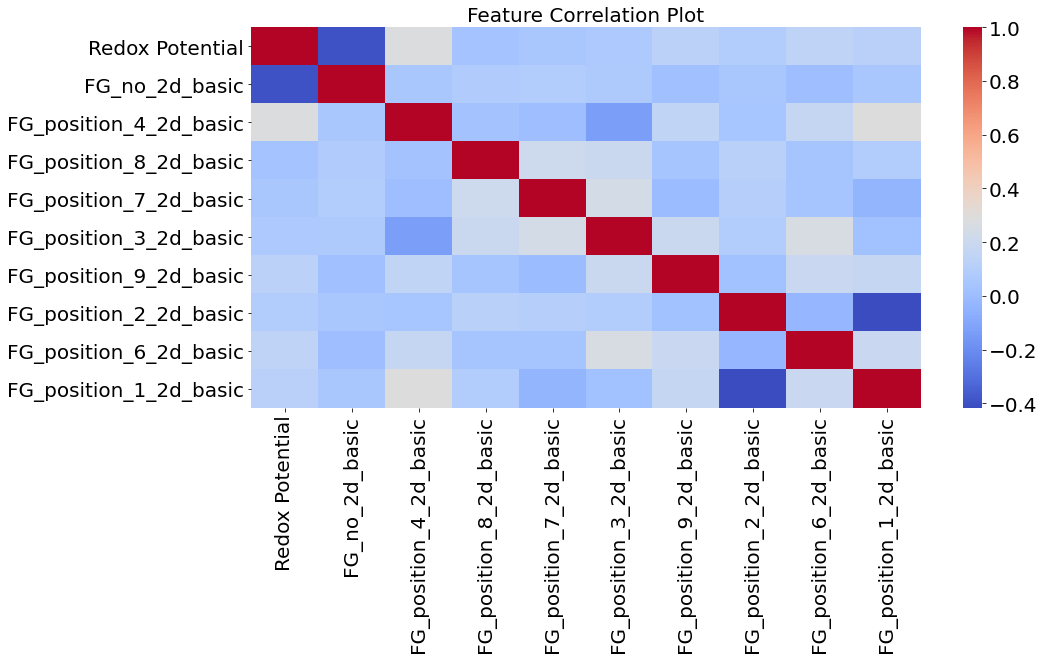

In [56]:
# plt.matshow(corr)
# corr.style.background_gradient(cmap='coolwarm').set_precision(2)
import seaborn as sns
pd.options.display.max_rows = 4000

top_features=rf_top_features.copy()
top_features.append('Redox Potential')

corr = data[top_features[::-1]].corr()
sns.heatmap(corr,cmap='coolwarm')
plt.title('Feature Correlation Plot')

In [32]:
# #seed=200
# train_dist=data.iloc[X_train.index]['FG_name'].value_counts()
# test_dist=data.iloc[X_test.index]['FG_name'].value_counts()
# fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(30,20))

# ax1.bar(gb.index,gb['%_absolute_error'],label='% Abs. Error')
# ax2.bar(test_dist.index,test_dist,label='Test Data')
# ax3.bar(train_dist.index,train_dist,label='Training Data')

# ax1.tick_params(axis='x', rotation=90)
# ax2.tick_params(axis='x', rotation=90)
# ax3.tick_params(axis='x', rotation=90)
# ax1.set_ylabel('% Abs. Error',fontsize=15)
# ax2.set_ylabel('Count',fontsize=15)
# ax3.set_ylabel('Count',fontsize=15)
# ax1.legend()
# ax2.legend()
# ax3.legend()
# # plt.tight_layout()

# Features


* **SlogP_VSA1 - SlogP_VSA12** - Sum of van der Waals surface area (in Å2) over all atoms such that SlogP is in a specified range [[1](http://www.cadaster.eu/sites/cadaster.eu/files/challenge/descr.htm)]


* **SlogP** - Log of the octanol/water partition coefficient (including implicit hydrogens). This property is an atomic contribution model [[Crippen 1999](https://pubs.acs.org/doi/full/10.1021/ci990307l)] that calculates logP from the given structure; i.e., the correct protonation state (washed structures). Results may vary from the logP(o/w) descriptor. The training set for SlogP was ~7000 structures.


* **fr_NH0** - Number of Tertiary amines


* **fr_NH2** - Number of Primary amines


* **fr_ArN** - Number of N functional groups attached to aromatics


* **fr_aniline** - Number of anilines


* **VSA_EState1 - VSA_EState10** MOE-type descriptors using EState indices and surface area contributions (developed at RD, not described in the CCG paper)[[2](http://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors)]


* **E-statesindex** - Electrotopological State index for atoms in a molecule. Encode the topology and electronic environment of molecular fragments. This index combines both the electronic character and the topological environment of each skeletal atom in a molecule [[3](https://pubs.acs.org/doi/pdf/10.1021/ci00001a012),[4](https://www.researchgate.net/publication/224004106_Electrotopological_State_Atom_E-State_Index_in_Drug_Design_QSAR_Property_Prediction_and_Toxicity_Assessment),[5](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6147309/)]


* **HallKierAlpha** - Ratio of non-C(sp3) atom covalent radii to the covalent radius of sp3 carbon summed over all atoms in a molecule [[6](https://onlinelibrary.wiley.com/doi/abs/10.1002/9780470125793.ch9)]


* **Chi(1/2)n** - Atomic connectivity index (order 1/2) in the hydrogen suppressed graph .This is calculated as the sum of 1/sqrt(didj) over all bonds between heavy atoms i and j where i < j. di (number of heavy neighbors)


* **Ipc** - information content of the coefficients of the characteristic polynomial of the adjacency matrix of a hydrogen-suppressed graph of a molecule


* **Chi3v** - Atomic valence connectivity index (order 3). This is calculated as the sum of 1/sqrt(vivj) over all bonds between heavy atoms i and j where i < j. For a heavy atom i let vi = (pi - hi) / (Zi - pi - 1) where pi is the number of s and p valence electrons of atom i.


* **BertzCT** - A topological index meant to quantify "complexity" of molecules. Consists of a sum of two terms, one representing the complexity of the bonding, the other representing the complexity of the distribution of heteroatoms (from graph theory)


* **Kappa3** - Third kappa shape index: (n-1) (n-3)2 / p32 for odd n, and (n-3) (n-2)2 / p32 for even n. n denotes the number of atoms in the hydrogen suppressed graph. Also, let p2 denote the number of paths of length 2 and p3 the number of paths of length 3


* **PEOE_VSA9** - calculated using partial using partial charges and van der waals surface area contributions of atoms


* **labuteASA** - Water accessible surface area calculated using a radius of 1.4 A for the water molecule. A polyhedral representation is used for each atom in calculating the surface area.


* **SMR_VSA(0-7)** - based on an approximate accessible van der Waals surface area (in Å2) and contribution to Molar Refractivity, summed over all atoms


* **MinAbsPartialCharge** - self-explanatory


* **MaxAbsEStateIndex** - Maximum Absolute Electrotopological State index of molecule


* **balabanJ** - Balaban's connectivity topological index

### References: 
1. http://www.cadaster.eu/sites/cadaster.eu/files/challenge/descr.htm, https://www.juit.ac.in/attachments/biomin/help.html


2. http://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors


3. https://pubs.acs.org/doi/pdf/10.1021/ci00001a012


4. https://www.researchgate.net/publication/224004106_Electrotopological_State_Atom_E-State_Index_in_Drug_Design_QSAR_Property_Prediction_and_Toxicity_Assessment


5. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6147309/


6. Hall, L.H., Kier, L.B.; The Molecular Connectivity Chi Indices and Kappa Shape Indices in Structure-Property Modeling; Reviews of Computational Chemistry 2


* [Crippen 1999] - Wildman, S.A., Crippen, G.M.; Prediction of Physiochemical Parameters by Atomic Contributions; J. Chem. Inf. Comput. Sci. 39 No. 5 (1999) 868–873




* **Graph Descriptors** - https://github.com/rdkit/rdkit-orig/blob/master/rdkit/Chem/GraphDescriptors.py


* **MOE** - MOE (Molecular Operating Environment) 2011 software were used to calculate about 300 molecular descriptors for each of these compounds


* **SMR** - molar refractivity (MR), a common descriptor accounting for molecular size and polarizability (https://pubs.acs.org/doi/full/10.1021/ci990307l)

* https://www.researchgate.net/figure/Molecular-descriptors-used-and-their-explanation-adapted-from-MOE-tutorial-Chemical_tbl1_225274017

* **fr** - http://rdkit.org/docs/source/rdkit.Chem.Fragments.html

* **BertzCT** - https://pubs.acs.org/doi/pdf/10.1021/ja00402a071

* **balabanJ** - https://www.sciencedirect.com/science/article/pii/0009261482800092


# List of All Descriptors Used in Training

In [33]:
list(X.columns)

['FG_no',
 'FG_position_1',
 'FG_position_2',
 'FG_position_3',
 'FG_position_4',
 'FG_position_6',
 'FG_position_7',
 'FG_position_8',
 'FG_position_9',
 'ABC',
 'ABCGG',
 'nAcid',
 'SpAbs_A',
 'SpMax_A',
 'SpDiam_A',
 'SpAD_A',
 'SpMAD_A',
 'LogEE_A',
 'VE1_A',
 'VE2_A',
 'VE3_A',
 'VR1_A',
 'VR2_A',
 'VR3_A',
 'nAromAtom',
 'nAromBond',
 'nAtom',
 'nHeavyAtom',
 'nHetero',
 'nH',
 'nC',
 'nN',
 'nO',
 'nS',
 'nP',
 'nF',
 'nCl',
 'nX',
 'ATS0dv',
 'ATS1dv',
 'ATS2dv',
 'ATS3dv',
 'ATS4dv',
 'ATS5dv',
 'ATS6dv',
 'ATS7dv',
 'ATS8dv',
 'ATS0d',
 'ATS1d',
 'ATS2d',
 'ATS3d',
 'ATS4d',
 'ATS5d',
 'ATS6d',
 'ATS7d',
 'ATS8d',
 'ATS0s',
 'ATS1s',
 'ATS2s',
 'ATS3s',
 'ATS4s',
 'ATS5s',
 'ATS6s',
 'ATS7s',
 'ATS8s',
 'ATS0Z',
 'ATS1Z',
 'ATS2Z',
 'ATS3Z',
 'ATS4Z',
 'ATS5Z',
 'ATS6Z',
 'ATS7Z',
 'ATS8Z',
 'ATS0m',
 'ATS1m',
 'ATS2m',
 'ATS3m',
 'ATS4m',
 'ATS5m',
 'ATS6m',
 'ATS7m',
 'ATS8m',
 'ATS0v',
 'ATS1v',
 'ATS2v',
 'ATS3v',
 'ATS4v',
 'ATS5v',
 'ATS6v',
 'ATS7v',
 'ATS8v',
 'ATS0se